# Chin Yang's Experiment

## Importing libraries

In [52]:
import os, mpld3
import glob
from os import listdir
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy.fftpack as sp
import pprint
import re
import time
from tqdm import tqdm
startTime = time.time()


%matplotlib inline
mpld3.enable_notebook()

## Retrieving Raw Motion Data

In [53]:
# getting current directory
cwd = os.getcwd()
print(cwd)
# testing folder directory
# df = pd.read_csv('Motion Data/ftap-lvl0-forearm_S2_2019-12-05T09.55.32.037_C49948A1895C_Accelerometer_1.4.5.csv')
# df
# folder = ('Motion Data/')

C:\Users\User\Desktop\4th_year_project\Parkinson-Disease-Repository\Testground\Test 3 - Chin Yang Playground


## Sensor Testing

## Time Series Data

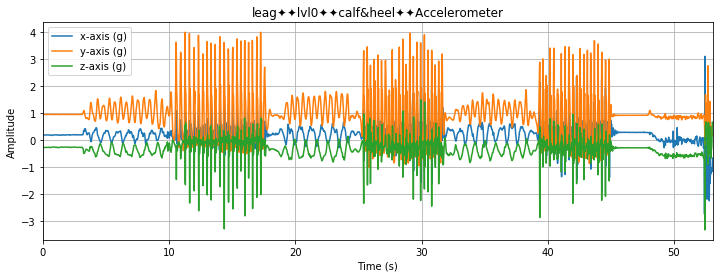

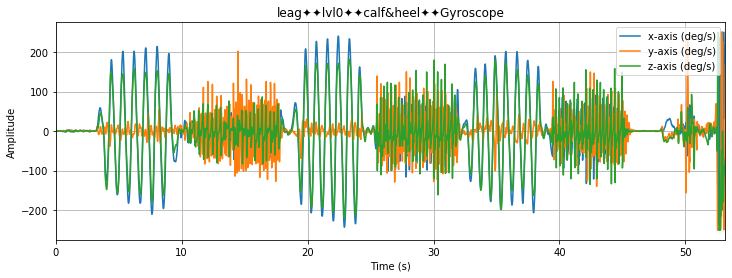

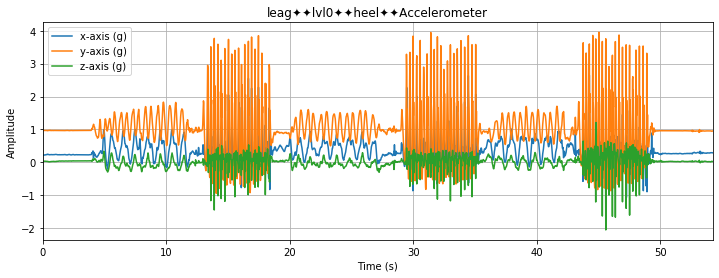

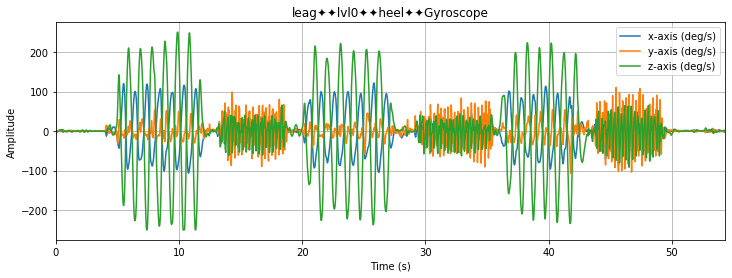

In [70]:
# def find_csv(folder, suffix=".csv"):
#     filenames = listdir(folder)
#     return [filename for filename in filenames if filename.endswith(suffix)]

# print(*find_csv(folder), sep ='\n')

# def csv():
#     for name in glob.glob('Motion Data/*'):
#         print (name) 
# csv()

def plot_raw():
    for name in glob.glob('Motion Data/*.csv'):
        df = pd.read_csv(name)
        if ('leag' in name) and ('lvl0' in name):
            if True:
                if ('Accelerometer' in name):
                    oldname = name[12:-64].replace('_','')
                    newname1 = oldname.split('-')[0] + '\u2726''\u2726' + oldname.split('-')[1] + '\u2726''\u2726' + oldname.split('-')[2] + '\u2726''\u2726' + 'Accelerometer'
                
                    ax1 = df.plot(x='elapsed (s)', y=['x-axis (g)','y-axis (g)','z-axis (g)'], 
                                  grid=True,figsize=(12,4), title=newname1)
                    ax1.set_xlabel('Time (s)')
                    ax1.set_ylabel('Amplitude')
                           
                elif ('Gyroscope' in name):
                    oldname = name[12:-59].replace('_','')
                    newname2 = oldname.split('-')[0] + '\u2726''\u2726' + oldname.split('-')[1] + '\u2726''\u2726' + oldname.split('-')[2] + '\u2726''\u2726' + 'Gyroscope'
                   
                    ax2 = df.plot(x='elapsed (s)', y=['x-axis (deg/s)','y-axis (deg/s)','z-axis (deg/s)'], 
                                 grid=True,figsize=(12,4), title=newname2)
                    ax2.set_xlabel('Time (s)')
                    ax2.set_ylabel('Amplitude')
                    
                    

plot_raw()






In [50]:
# dataframes = []
# for file_ in glob.glob('Motion Data/*.csv'):
#     df = pd.read_csv(file_,index_col=None, header=0)
#     dataframes.append(df)
# # print(dataframes)

# def truncation(file, before, after):
    


## Frequency Spectrum


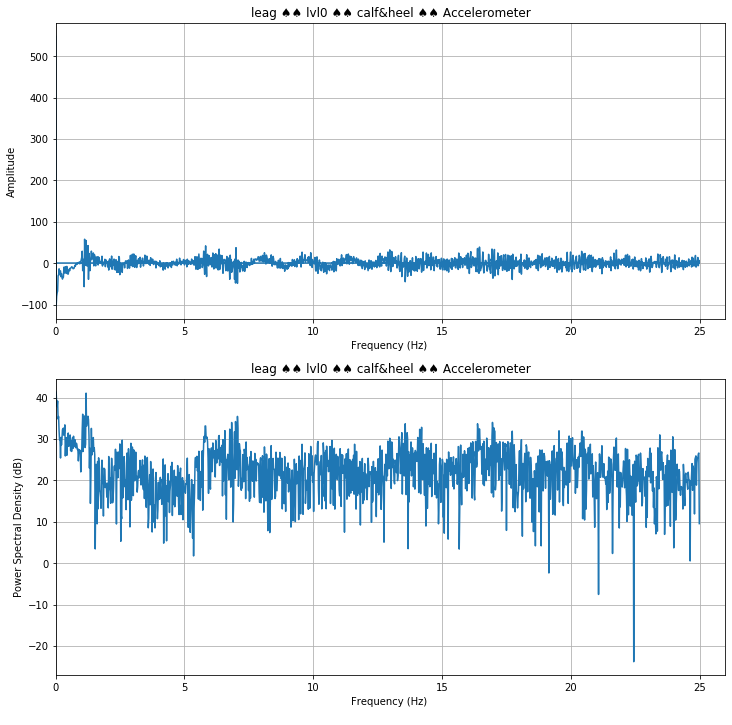

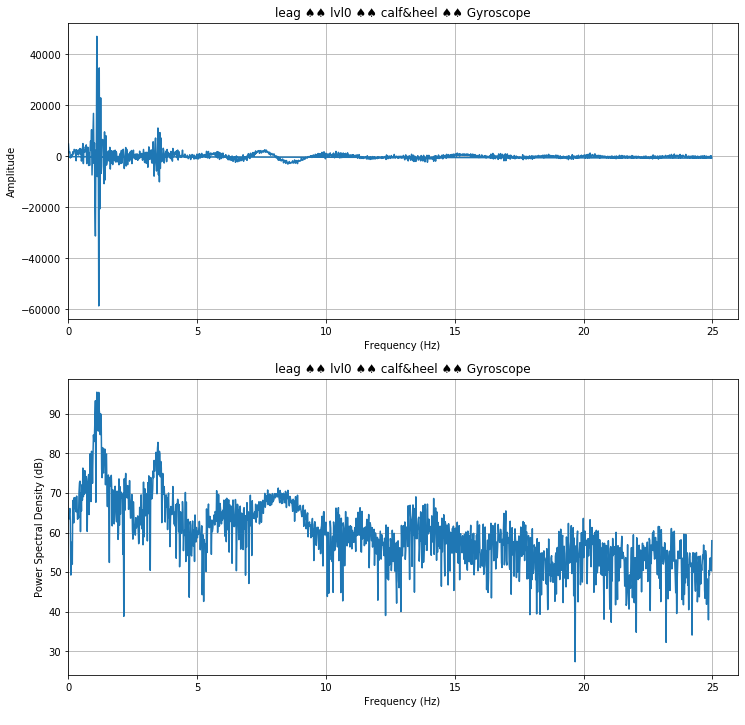

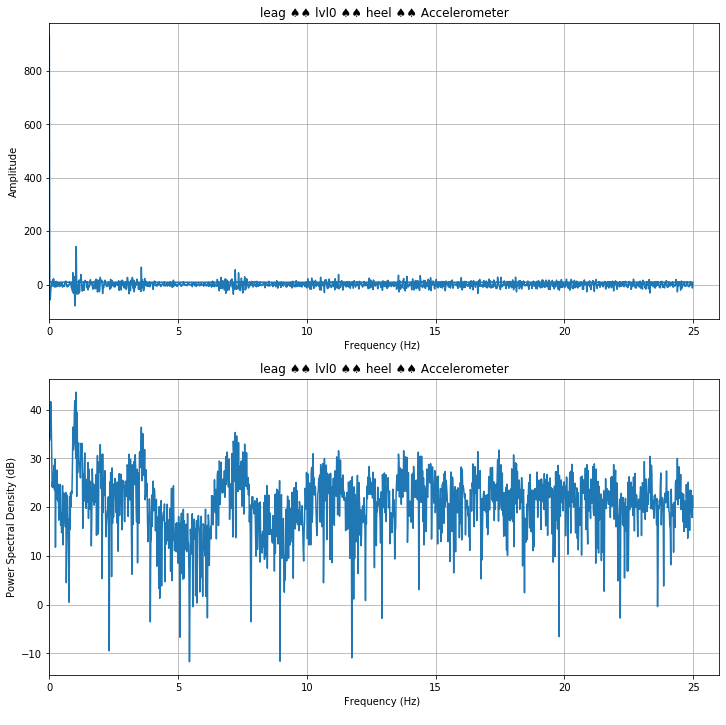

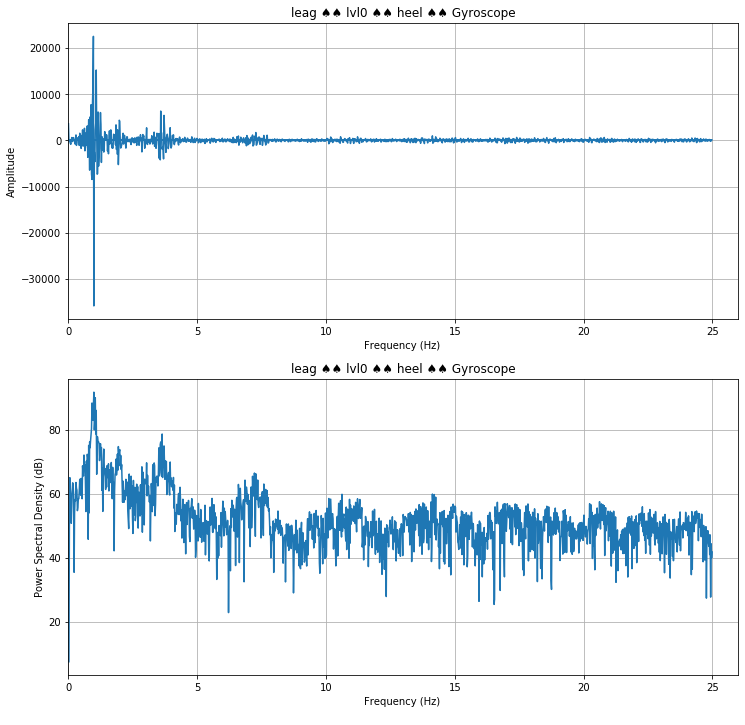

In [111]:
def freq():
    for name in glob.glob('Motion Data/*.csv'):
        df = pd.read_csv(name)
        if ('leag' in name) and ('lvl0' in name):
            if True:
                if ('Accelerometer' in name):
                    xf = df['x-axis (g)']
                    yf = df['y-axis (g)']
                    zf = df['z-axis (g)']
                    Fs = 50
                    n = len(xf)
                    mag_fft = sp.fft(xf)
                    psd = np.abs(mag_fft)**2
                    N = len(psd)
                    fftfreq1 = sp.fftfreq(n, 1/Fs)
                    fftfreq = sp.fftfreq(N, 1/Fs)
                    i = fftfreq > 0
                    
                    oldname = name[12:-64].replace('_','')
                    newname1 = oldname.split('-')[0] + ' ''\u2660''\u2660'' ' + oldname.split('-')[1] + ' ''\u2660''\u2660'' ' + oldname.split('-')[2] + ' ''\u2660''\u2660'' ' + 'Accelerometer'
                    
                    fig, ax3 = plt.subplots(2, 1, figsize=(12,12))
                    ax3[0].set_title(newname1)
                    ax3[0].grid()
                    ax3[0].set_xlim(0, 26)
                    ax3[0].plot(fftfreq1, mag_fft)
                    ax3[0].set_xlabel('Frequency (Hz) \n')
                    ax3[0].set_ylabel('Amplitude')
                    
#                     Frequency spectrum (Log scale)
                    ax3[1].set_title(newname1)
                    ax3[1].grid()
                    ax3[1].set_xlim(0, 26)
                    ax3[1].plot(fftfreq[i], 10*np.log10(psd[i]))
                    ax3[1].set_xlabel('Frequency (Hz) \n')
                    ax3[1].set_ylabel('Power Spectral Density (dB)')
                    
                elif ('Gyroscope' in name):
                    xf = df['x-axis (deg/s)']
                    yf = df['y-axis (deg/s)']
                    zf = df['z-axis (deg/s)']
                    Fs = 50
                    n = len(xf)
                    mag_fft = sp.fft(xf)
                    psd = np.abs(mag_fft)**2
                    N = len(psd)
                    fftfreq1 = sp.fftfreq(n, 1/Fs)
                    fftfreq = sp.fftfreq(N, 1/Fs)
                    i = fftfreq > 0
                    
                    oldname = name[12:-59].replace('_','')
                    newname2 = oldname.split('-')[0] + ' ''\u2660''\u2660'' ' + oldname.split('-')[1] + ' ''\u2660''\u2660'' ' + oldname.split('-')[2] + ' ''\u2660''\u2660'' ' + 'Gyroscope'

                    fig, ax4 = plt.subplots(2, 1, figsize=(12,12))
                    ax4[0].set_title(newname2)
                    ax4[0].grid()
                    ax4[0].set_xlim(0, 26)
                    ax4[0].plot(fftfreq1, mag_fft)
                    ax4[0].set_xlabel('Frequency (Hz) \n')
                    ax4[0].set_ylabel('Amplitude')
                    
                    ax4[1].set_title(newname2)
                    ax4[1].grid()
                    ax4[1].set_xlim(0, 26)
                    ax4[1].plot(fftfreq[i], 10*np.log10(psd[i]))
                    ax4[1].set_xlabel('Frequency (Hz) \n')
                    ax4[1].set_ylabel('Power Spectral Density (dB)')
                    
                    
freq()

## Smoothen Data

## Noise

In [ ]:
# df1 = pd.read_csv('PD_redo/noise-4g-250_Metawear_2020-02-03T12.49.14.734_C5013CAC38C1_Accelerometer_1.5.0.csv')
# df1

In [ ]:

print("--- %s seconds ---" % (time.time() - startTime))

## Archive

In [ ]:
"""
CHECKING
CLIPPING EFFECT (Y/N,Y/N), TRUNCATION [(,)(,)(,)], DOMINANT AXIS (X/Y/Z) 
ftap lvl0 - N,            
ftap lvl1 - N
ftap lvl2 - N
ftap lvl3 - N
ftap lvl4
hmove lvl0
hmove lvl1
hmove lvl2
# inspect potential tremor motions in between tries
hmove lvl3
hmove lvl4
leag lvl0
leag lvl1
# calf-heel & heel data same, Sara to redo?
leag lvl2
leag lvl3
# check for anomalies. Truncated accelerometer values might be useful despite being displayed otherwise in gyroscope
leag lvl4
prosup lvl0
prosup lvl1
prosup lvl2
prosup lvl3
prosup lvl4
tota lvl0
tota lvl1
tota lvl2
tota lvl3
tota lvl4
ttap lvl0
ttap lvl1
ttap lvl2
ttap lvl3
ttap lvl4
tugt lvl0
tugt lvl1
tugt lvl2
tugt lvl3
tugt lvl4
"""